# Naive Bayes
## Instructions:
* Go through the notebook and complete the tasks. 
* Make sure you understand the examples given. If you need help, refer to the Essential readings or the documentation link provided, or go to the Topic 9 discussion forum. 
* Save your notebooks when you are done.
 
**Task 1:**
Run the code below in order to understand how to use Naive Bayes classification under sklearn. Then follow the exercise at the bottom of the notebook.

In [2]:
%matplotlib inline

from sklearn import datasets, naive_bayes
import numpy as np

np.random.seed(1345)

# Load the wine dataset (description here http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)
wine = datasets.load_wine()
data = wine.data.copy()
target = wine.target.copy()

# Split the data into training/testing sets
total_samples = wine.target.shape[0]
exclude = round(total_samples/3)
indices = np.arange(0,total_samples)
np.random.shuffle(indices)

idx_train = indices[:-exclude]
idx_test = indices[-exclude:]

assert not np.intersect1d( idx_test, idx_train ).size

X_train = data[idx_train]
X_test = data[idx_test]

# Split the targets into training/testing sets
y_train = target[idx_train]
y_test = target[idx_test]

print(y_test)


[0 1 2 2 2 0 0 0 1 2 1 0 1 1 1 0 1 1 0 1 0 2 0 1 2 2 2 2 0 0 2 2 1 1 0 1 1
 1 2 1 0 2 1 0 2 1 0 1 1 1 0 1 1 0 1 0 2 1 2]


### Naive Bayes with scikit-learn
Go through the code below and then run the cell to perform Naive Bayes with scikit-learn

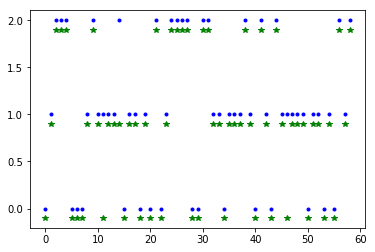

[[16  2  0]
 [ 0 24  1]
 [ 0  0 16]]
accuracy: 0.95
class 0, precision: 1.00, recall: 0.89,  f-score: 0.94
class 1, precision: 0.92, recall: 0.96,  f-score: 0.94
class 2, precision: 0.94, recall: 1.00,  f-score: 0.97


In [4]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# create a naive Bayes model with Gaussian observations
nb = naive_bayes.GaussianNB()
# Train using training set
nb.fit(X_train, y_train)

# Predict using test set
y_pred = nb.predict(X_test)

# Plot outputs
plt.plot(y_test-0.1,'g*')
plt.plot(y_pred,'b.')
plt.show()

# evaluation
print(metrics.confusion_matrix(y_test, y_pred))
print("accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))

# calculate precision and recall (and f-score, a weighted average of precision and recall) 
precision,recall,fscore,_ = metrics.precision_recall_fscore_support(y_test,y_pred )
for c in np.unique(y_test):
        print("class %s, precision: %.2f, recall: %.2f,  f-score: %.2f" % (c, precision[c], recall[c], fscore[c]))



### Naive Bayes using objects

Try running the following Naive Bayes binary classifier as an OO object. Have a look at how the class structure of myGaussianNB works. Refer to the python documentation on 'class'.


In [5]:
class myGaussianNB:
    def __init__(self):
        # initialise the object
        self.nb = naive_bayes.GaussianNB()
        
    def fit(self, X_train, y_train):
        self.nb.fit(X_train, y_train)
    
    def predict(self, X_test):
        return self.nb.predict(X_test)
        
# evaluate as a binary classifier (i.e. only consider class 0 vs. rest from the above)
target_binary = np.zeros( target.shape )
target_binary[target==0] = 1 
y_train_bin = target_binary[idx_train]
y_test_bin = target_binary[idx_test]

myNB = myGaussianNB()

myNB.fit(X_train, y_train_bin)
y_pred_bin = myNB.predict(X_test)

# now do the evaluation
print(metrics.confusion_matrix(y_test_bin, y_pred_bin))
print("accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))



[[40  1]
 [ 2 16]]
accuracy: 0.95


**Task 2:**
Now try to implement the above code for the myGaussianNB class, but instead of using sklearn's naive_bayes.GaussianNB(), fill in the gaps below to implement your own version using Bayes theorem. Your classifier should return the same results as above. 



In [141]:
import math
import scipy.stats as stats

class myGaussianNB:
    
    def __init__(self):
        # initialise the attributes of this class
        # your code here
                
    def fit(self, X_train, y_train):
        # your code here
            
    def predict(self, X_test):
        # your code here
        return predictions
        
    
myNB = myGaussianNB()

myNB.fit(X_train, y_train_bin)

y_pred_bin = myNB.predict(X_test)

# now do the evaluation
print(metrics.confusion_matrix(y_test_bin, y_pred_bin))
print("accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))




[[40  1]
 [ 2 16]]
accuracy: 0.95
